In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model

In [3]:
dfreal = pd.read_excel('realestate.xls')
dfreal.shape[0]
dfreal.shape[1]

realDict = {'No': 'No','X1 transaction date': 'Date', 'X2 house age': 'House_age', 'X3 distance to the nearest MRT station': 'nearest_station_distance',
            'X4 number of convenience stores': 'number_convienience_store', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 'Y house price of unit area': 'price_per_unit'}
dfreal.rename(columns=realDict, inplace=True)
dfreal.head()

,No,Date,House_age,nearest_station_distance,number_convienience_store,latitude,longitude,price_per_unit
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


,No,Date,House_age,nearest_station_distance,number_convienience_store,latitude,longitude,price_per_unit,predicted_price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,34.387068
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,37.530673
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,39.089901
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,39.089901
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,41.177255


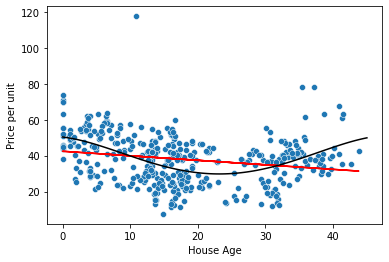

In [4]:
sns.scatterplot(x='House_age', y ='price_per_unit', data=dfreal)
plt.xlabel('House Age')
plt.ylabel('Price per unit')
reg = linear_model.LinearRegression()
poly_reg = linear_model.LinearRegression()
reg.fit(dfreal[['House_age']], dfreal.price_per_unit)
#reg.predict(dfreal.House_age[4].reshape(1,1))
dfreal['predicted_price'] = reg.predict(dfreal[['House_age']])
plt.plot(dfreal.House_age, dfreal.predicted_price, color = 'red')
poly3 = np.polyfit(dfreal.House_age, dfreal.price_per_unit, 4)
xp = np.linspace(0, 45, 100)
plt.plot(xp, np.polyval(poly3, xp), color = 'black')
dfreal.head()


In [5]:
import math
reg = linear_model.LinearRegression()
# used to train the model on training set
reg.fit(dfreal[['House_age', 'nearest_station_distance', 'number_convienience_store']], dfreal.price_per_unit)
print('Coeffiecients are: ', reg.coef_)
print('Intercept is: ', reg.intercept_)
print('Price per unit: ',math.floor(reg.predict([[25, 90, 10]])))

Coeffiecients are:  [-0.25285583 -0.00537913  1.29744248]
Intercept is:  42.9772862060641
Price per unit:  49


In [6]:
from word2number import w2n
autodf = pd.read_csv('auto.csv', header=None)
autodf.columns = ['symboling', 'normalized_loss', 'make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 
                    'drive_wheels', 'engine_location', 'wheelbase', 'length', 'width', 'height', 'curb_weight', 
                    'engine_type', 'num_of_cylinders', 'engien_size', 'fuel_system','bore', 'stroke', 'compression_ratio', 
                    'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
autodf.drop(columns=['symboling', 'normalized_loss', 'aspiration', 'body_style',
                     'drive_wheels', 'engine_location', 'fuel_system'], inplace=True)
autodf.num_of_cylinders =autodf.num_of_cylinders.apply(w2n.word_to_num)
autoDic = {'?': 0}
autodf['horsepower'] = autodf['horsepower'].replace(autoDic).astype(int)
autodf.head()

,make,fuel_type,number_of_doors,wheelbase,length,width,height,curb_weight,engine_type,num_of_cylinders,engien_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,94.5,171.2,65.5,52.4,2823,ohcv,6,152,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,four,99.8,176.6,66.2,54.3,2337,ohc,4,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,four,99.4,176.6,66.4,54.3,2824,ohc,5,136,3.19,3.40,8.0,115,5500,18,22,17450


['autoreg_joblib']

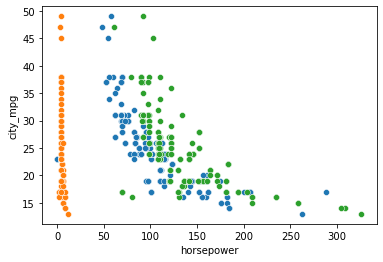

In [7]:
autoreg = linear_model.LinearRegression()
autoreg.fit(autodf[['num_of_cylinders', 'engien_size', 'horsepower']], autodf.city_mpg)
sns.scatterplot(x='horsepower', y='city_mpg', data=autodf)
sns.scatterplot(x='num_of_cylinders', y='city_mpg', data=autodf)
sns.scatterplot(x='engien_size', y='city_mpg', data=autodf)
autodf['city_mpg_predicted'] = autoreg.predict(
    autodf[['num_of_cylinders', 'engien_size', 'horsepower']])
autodf.head()

import joblib
joblib.dump(autoreg, 'autoreg_joblib')

# Gradient Descent (cost funtion or MSE)

In [8]:
def predict_sklearn():
    reg = linear_model.LinearRegression()
    reg.fit(autodf[['horsepower']], autodf.city_mpg)
    return reg.coef_, reg.intercept_

def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(xp)
    learning_rate = .0001
    cost_previous =0
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)* sum((y - y_predicted)**2)
        m_derivative = -(2/n) + sum(-x * (y - y_predicted))
        b_derivative = -(2/n) + sum(y - y_predicted)
        m_curr = m_curr - learning_rate * m_derivative
        b_curr = m_curr - learning_rate * b_derivative
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        #print('m_value {}, b_value {}, cost_value {}, iterations {}'.format(m_curr, b_curr, cost, i))
    return m_curr, b_curr

if __name__ == '__main__':
    m_sklrn, b_sklrn = predict_sklearn()
    print('Coef {}, Intercept {}'.format(m_sklrn, b_sklrn))

    m, b = gradient_descent(autodf.horsepower, autodf.city_mpg)
    print('G Coef {}, G Intercept {}'.format(m, b))


Coef [-0.12318258], Intercept 37.936761350779236
G Coef -9.131126431332955e+157, G Intercept -9.054193320173361e+157


# One hot encoding

In [9]:
autodf.head()

,make,fuel_type,number_of_doors,wheelbase,length,width,height,curb_weight,engine_type,num_of_cylinders,engien_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_mpg_predicted
0,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,13495,23.183092
1,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,16500,23.183092
2,alfa-romero,gas,two,94.5,171.2,65.5,52.4,2823,ohcv,6,152,2.68,3.47,9.0,154,5000,19,26,16500,21.899417
3,audi,gas,four,99.8,176.6,66.2,54.3,2337,ohc,4,109,3.19,3.40,10.0,102,5500,24,30,13950,25.729155
4,audi,gas,four,99.4,176.6,66.4,54.3,2824,ohc,5,136,3.19,3.40,8.0,115,5500,18,22,17450,24.822110


In [10]:
dummies = pd.get_dummies(autodf.make)
dummies

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
merged = pd.concat([autodf, dummies], axis= 1)
autofinal = merged.drop(
    ['make', 'nissan', 'fuel_type', 'number_of_doors', 'wheelbase', 'engine_type', 'bore', 
    'stroke', 'compression_ratio', 'peak_rpm', 'highway_mpg', 'city_mpg_predicted'], axis=1)

autoreg = linear_model.LinearRegression()
autofinal.head()


,length,width,height,curb_weight,num_of_cylinders,engien_size,horsepower,city_mpg,price,alfa-romero,...,mitsubishi,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,168.8,64.1,48.8,2548,4,130,111,21,13495,1,...,0,0,0,0,0,0,0,0,0,0
1,168.8,64.1,48.8,2548,4,130,111,21,16500,1,...,0,0,0,0,0,0,0,0,0,0
2,171.2,65.5,52.4,2823,6,152,154,19,16500,1,...,0,0,0,0,0,0,0,0,0,0
3,176.6,66.2,54.3,2337,4,109,102,24,13950,0,...,0,0,0,0,0,0,0,0,0,0
4,176.6,66.4,54.3,2824,5,136,115,18,17450,0,...,0,0,0,0,0,0,0,0,0,0


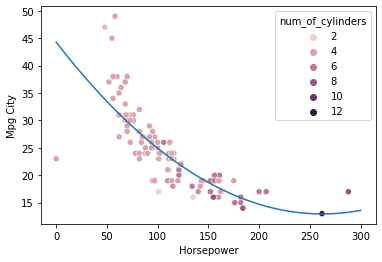

In [12]:
lendic = {'?': 0}
autofinal['length'] = autofinal['length'].replace(lendic).astype(int)
widdic = {'?': 0}
autofinal['width'] = autofinal['width'].replace(widdic).astype(int)
heidic = {'?': 0}
autofinal['height'] = autofinal['height'].replace(heidic).astype(int)
curbdic = {'?': 0}
autofinal['curb_weight'] = autofinal['curb_weight'].replace(curbdic).astype(int)
endic = {'?': 0}
autofinal['engien_size'] = autofinal['engien_size'].replace(endic).astype(int)
prdic = {'?': 0}
autofinal['price'] = autofinal['price'].replace(prdic).astype(int)
X = autofinal.drop(['city_mpg'], axis =1)
autoreg.fit(X, autofinal.city_mpg)
autoreg.score(X, autofinal.city_mpg)
sns.scatterplot(x='horsepower', y='city_mpg',
                hue='num_of_cylinders', data=autofinal)
plt.xlabel('Horsepower')
plt.ylabel('Mpg City')

polyauto = np.polyfit(autofinal.horsepower, autofinal.city_mpg, 2)
xp = np.linspace(0, 300, 100)
plt.plot(xp, np.polyval(polyauto, xp))


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = autodf
autodf.make = le.fit_transform(autodf.make)

# Split train and test

In [14]:
autofinal = autofinal[['num_of_cylinders',
                       'engien_size', 'horsepower', 'price', 'city_mpg']]
autofinal.head()                       

,num_of_cylinders,engien_size,horsepower,price,city_mpg
0,4,130,111,13495,21
1,4,130,111,16500,21
2,6,152,154,16500,19
3,4,109,102,13950,24
4,5,136,115,17450,18


,num_of_cylinders,engien_size,horsepower,price,city_mpg
0,4,130,111,13495,21
1,4,130,111,16500,21
2,6,152,154,16500,19
3,4,109,102,13950,24
4,5,136,115,17450,18


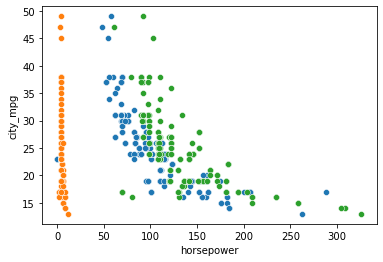

In [15]:
sns.scatterplot(x='horsepower', y='city_mpg', data=autofinal)
sns.scatterplot(x='num_of_cylinders', y='city_mpg', data=autofinal)
sns.scatterplot(x='engien_size', y='city_mpg', data=autofinal)

X = autofinal.drop(['city_mpg'], axis=1)
y = autofinal['city_mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

trainreg = linear_model.LinearRegression()
trainreg.fit(X_train, y_train)
trainreg.score(X_test, y_test)
autofinal.head()

# Logistic Regression

In [24]:
winedf = pd.read_csv('wine.csv')
winedf.dtypes
winedf.isnull().sum()
print(winedf.shape)
winedf['quality'] = winedf['response'].apply(lambda x: 1 if x >= 7 else 0)
winedf.head()

(6497, 13)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


Text(0, 0.5, 'Wine Quality')

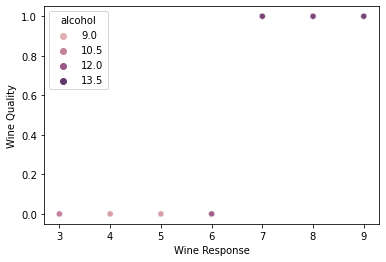

In [26]:
sns.scatterplot(x = winedf.response, y = winedf.quality,hue=winedf.alcohol)
plt.xlabel('Wine Response')
plt.ylabel('Wine Quality')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = winedf.drop(['response', 'color', 'quality'], axis= 1)
y = winedf['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
predited = pipe.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, predited))
print('Precision: score: ', precision_score(y_test, predited))
print('Accuracy Score: ', accuracy_score(y_test, predited))
print(classification_report(y_test, predited))


Confusion Matrix:
 [[1994   93]
 [ 375  137]]
Precision: score:  0.5956521739130435
Accuracy Score:  0.8199307425933051
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2087
           1       0.60      0.27      0.37       512

    accuracy                           0.82      2599
   macro avg       0.72      0.61      0.63      2599
weighted avg       0.79      0.82      0.79      2599



In [62]:
hrdf = pd.read_csv('hrdata.csv')
print(hrdf.shape)
hrdf.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
